In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

cmap = plt.cm.get_cmap('Paired')
num_colors = 20
color = cmap(np.linspace(0, 1, num_colors))
escala = 1

## línea de visión 
def recta(x_0, y_0, x, angulo): # todos los puntos son conocidos, la función bota un punto adelante 
    y_recta= y_0+np.tan(np.radians(angulo))*(x-x_0)     

    return y_recta 

def angulos(x_0, y_0, x,y): # todos los puntos son conocidos, la función bota un punto adelante 
    angulos = np.degree(np.arctan((y-y_0)/(x-x_0)*escala))

    return angulos #en grados

############################ 
# calcula el p0
# compara el array del cerro con la recta y da el valor de intersección
# pt_ob = (pt_obx, pt_oby) , array = valor en y del objeto cerro , array_recta = valores de y de la recta en la
# array_x = valores en x
# dirección de observación 

def pto_0(pt_ob, array_x, array): 
    for i in range(pt_ob[0], len(array_x)):
        if pto_0[1]==array[i]: 
            pto_inicial= i
    return (pto_inicial, pto_0[1])

def indice_p2(pt_ob, array_x, array_cerro, array_recta):  #indice final de cruce 
    indice_inicial = 0
    for i in range(pt_ob[0], len(array_x)):
        if (array_recta[i]-array_cerro[i])<0: 
            indice_inicial = i            
                
    return (indice_inicial, array_cerro[indice_inicial])

def indice_p1(pt_ob, array_x, array_cerro, array_recta):  #indice incial de cruce 
    indice_final = 0
    for i in range(pt_ob[0], len(array_x)):
        if (array_recta[i]-array_cerro[i])<0: 
            indice_final = i
            break
                
    return (indice_final, array_cerro[indice_final])
    
def distancia(p1, p2): #distancia entre dos puntos 
 
    dist = math.sqrt((p2[1]-p1[1])**2 + (p2[0]-p1[0])**2)  
    return dist  

##############################
## Punto de inicio ## creo que no es usado 
#ptx:   pto de observación
#arr_x: array de valores en X
#arr_y: array de valores del perfil del cerro en Y 

def inicio(punto_inicio, arr_x, arr_y): 
    punto_inicio[0]
    
    for j in range(punto_inicio[0],len(arr_x),1):
        if punto_inicio[1] > arr_y[j]:
            inicio = arr_y[j]
    
    return inicio

###############################
## CÁLCULO DEL LA ELEVACIÓN MÁXIMA DE OBSERVACION


def angulo_maximo(arr_x, np_array, p): #arra_x: indices en el eje X, fila: fila de analisis, p: punto de observación 
        vec_picos = []
        vec  = []
        ind_y = 0 
        ind_x = 0 
    
        for j in range(p[0], len(arr_x)): 
            if np_array[j] > ind_y:
                ind_y = np_array[j]
                ind_x = j 
                
                
        vec_picos.append(ind_x) 
        vec_picos.append(ind_y) 
        
        phi_max = np.degrees(np.tan((ind_y-p[1])/(arr_x[ind_x]-p[0])))
        
        
        return (vec_picos, phi_max) #ángulo en grados
    
#ecuaciones de pérdida de energía 


def funciondEdX(E): 
    me = 0.0005285 #GeV/c2
    mu = 0.1057 #GeV/c2
    
    
    Emax = (E**2)/(E+(mu**2)/(2*me))
    dEdx = 1.84 + 0.076* np.log(Emax/(mu))

    return dEdx
        
        
def perdida_energia_total(E, d): #energia y distancia por recorrer
    
    
    temp = E
    ar_x = np.linspace(0, d, 100)
    
    for i in range(len(ar_x)): 
        
        temp = temp - funciondEdX(temp)  
        
        if temp < 0 : 
            control = False
            temp = 0
            break 
        control = True
        
    energia_final = temp 
    
    return (energia_final, control)

## Diccionario de distancias 

def acceder_diccionario(diccionario, valor_clave):
    valor_distancia = 0 
    for clave, valor in diccionario.items(): 
        if clave == valor_clave: 
            valor_distancia = diccionario[valor_clave]
    return valor_distancia 

In [2]:
fila = 250
n,m = 300 ,120 #punto de observación
apertura = 20 #apertura del ángulo 
factor = 1 # de acuerdo a datos de CONIDA
fac = 1000 # Conversión MeV to GeV
angle_observation = 270
phi1 , phi2 = 269, 271 #posición de observación
file_shw =  './salida_d_2.shw'
file_raster = './rastert_dem_uni1-clean.txt' ## DEM file 

df1=pd.read_csv(file_shw,sep =" ", header=None) #archivo del shower 
## CARGAR LOS DATOS DEL RASTER 
df = pd.read_csv(file_raster, sep =" ", header=None)
df = df.fillna(0)
df = df.drop(columns=626)#eliminar la última columna 
columnas = df.shape[1] 
filastotal=df.shape[0]

arr_x = np.linspace(0,columnas-1,columnas) * escala #crea los valores en x para iterar
pt_ob = [n,m] #punto de observación
arr_y_cerro = df.iloc[fila].to_numpy()
ang_max = int(np.round(angulo_maximo(arr_x, arr_y_cerro, pt_ob)[1])) 
theta1, theta2= ang_max-apertura, ang_max-2.0 #angulos de observación en el shower


In [3]:
print(theta1, theta2)

7 25.0


In [4]:
ang_max = int(np.round(angulo_maximo(arr_x, arr_y_cerro, pt_ob)[1])) 
print(angulo_maximo(arr_x, arr_y_cerro, pt_ob)[0][0])

def recta2(x_0, y_0, x, x2,y2): # todos los puntos son conocidos, la función bota un punto adelante 
    y_recta2= y_0+np.tan((y2-y_0)/(x2-x_0))*(x-x_0)     

    return y_recta2 

384


7 25.0


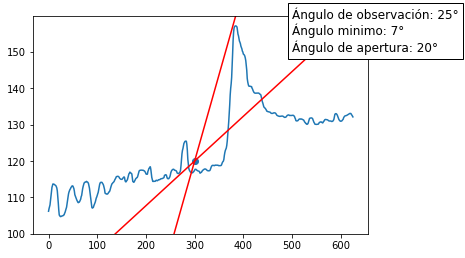

In [5]:
### espacio temporal para analizar
plt.plot(arr_y_cerro)
#plt.xlim(200)
plt.ylim(100)
y1 = recta(pt_ob[0], pt_ob[1], arr_x, theta1)     
#y2 = recta(pt_ob[0], pt_ob[1], arr_x, theta2)     
y2 = recta2(pt_ob[0], pt_ob[1], arr_x, angulo_maximo(arr_x, arr_y_cerro, pt_ob)[0][0],angulo_maximo(arr_x, arr_y_cerro, pt_ob)[0][1])     
   
plt.plot(arr_x, y1, color="red")
plt.plot(arr_x, y2, color="red")
texto = 'Ángulo de observación: '+str(round(theta2))+'°'+'\nÁngulo minimo: '+str(theta1)+'°' +'\nÁngulo de apertura: '+str(apertura)+'°'

plt.scatter(pt_ob[0], pt_ob[1])
plt.text(500, 150, texto,fontsize = '12', bbox=dict(facecolor='white', edgecolor='black', linewidth=1))
print(theta1, theta2)

In [6]:
##############################################################
## Cálculo de la energía y flujo de muones en el shower 
df1=df1.drop(index=range(6))  
df2 = df1[df1.columns[1:4]] 
px = df2[df2.columns[:1]].to_numpy()
py = df2[df2.columns[1:2]].to_numpy()
pz = df2[df2.columns[2:3]].to_numpy() 
pt=np.sqrt(px**2+py**2+pz**2)
m_rest=0.1057 #unit: GeV/c**2
Et=np.sqrt(pt**2+m_rest**2)
thetat=np.degrees(np.arccos(pz/pt))
at2=np.arctan2(py,px)
thetat=np.round(np.degrees(np.arccos(pz/pt)))
at2=np.arctan2(py,px)
phit=np.round(np.degrees((2*np.pi+at2)*(at2<0)+(at2)*(at2>0)))

#Ahora tenemos un archivo de ángulos de incidencia vs. energía con la que llegan. 
#Guardamos los datos nuevos con el formato requerido... Cargamos la nueva dataframe y ordenamos por ángulos.

data=np.c_[phit,thetat,Et] #theta ya esta en grados
data=data[data[:,1].argsort()] # Ordena de acuerdo a angulo theta  

# Obtenemos solo los que están en el rango phi1<phi<phi2 y theta1<theta<theta2
data=data[(data[:,0]== angle_observation) & (data[:,1]>=theta1) & (data[:,1]<=theta2)] #--- acá le pongo la condición 
#data=np.savetxt('totalrealCerroUNI_tpE_ordenados.out',data,delimiter=' ',fmt='%i %i %2f')
dfshower_filtrado = pd.DataFrame(data, columns=['phi','theta','E'])
#conteo de los valores a cielo abierto
dfshower_conteo=dfshower_filtrado.groupby(['phi','theta'])['E'].count().reset_index(name='count')
#dfshower_conteo.to_csv('totalrealCerroUNI_tpcount_ordenados_cielo_abierto.out',sep=' ',index=False)
#dfshower_conteo #conteo de eventos en el shower dependiendo de theta a cielo abierto 
############################################################################################################


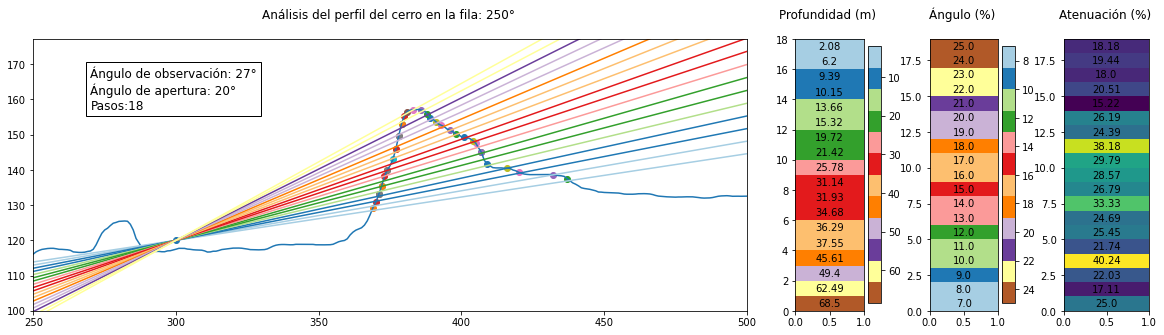

In [7]:
 

fig, axs = plt.subplots(1, 4,figsize=(20,5), gridspec_kw={'width_ratios': [5, 0.6,0.6,0.6]})  # 2 filas, 1 columna de subplots
#color = ['brown', 'purple', 'red', 'darkgreen','green', 'darkseagreen', 'darkblue','darkslateblue', 'cyan', 'crimson' ]

############
#PLOT 0 del perfil UNI 
############

axs[0].plot(arr_y_cerro)
axs[0].scatter(pt_ob[0], pt_ob[1])

vec_dis=[]
j=0
axs[0].set_title("Análisis del perfil del cerro en la fila: "+str(fila)+'° \n') 
for i in range(ang_max-apertura, ang_max,1):
    y = recta(pt_ob[0], pt_ob[1], arr_x, i)     
    p2 = indice_p2(pt_ob, arr_x, arr_y_cerro, y)
    p1 = indice_p1(pt_ob, arr_x, arr_y_cerro, y) 
    if (p2[0]!=0) or (p1[0]!=0):         
        axs[0].plot(arr_x, y, color=color[j])
        axs[0].scatter(p1[0], p1[1])
        axs[0].scatter(p2[0], p2[1])
        d = (distancia(p1,p2))*factor
        j=j+1
        evento = [fila, i,d]  #los valores registrados son azimutales, los valores en el plot son elevación
        vec_dis.append(evento)  # fila, i angulo de observación , distancia 
        
texto = 'Ángulo de observación: '+str(round(ang_max))+'°'+'\nÁngulo de apertura: '+str(apertura)+'°'+'\nPasos:'+ str(j) 
x_pos = n-30 # valor 20 de posición de texto en X
y_pos = np.max(arr_y_cerro) # valor de posición de caja de texto en Y
axs[0].text(x_pos, y_pos, texto,fontsize = '12', bbox=dict(facecolor='white', edgecolor='black', linewidth=1))
axs[0].set_xlim(n-50,500) 
axs[0].set_ylim(100, np.max(arr_y_cerro)+20)       

        
        
############
#PLOT 1 de la distancia
############
a=[] 
for i in range(len(vec_dis)):
    r = vec_dis[i][2]
    a.append(np.round(r,2))

a = np.array(a)
a=a[::-1] 
matriz = np.tile(a, (1,1))
matriz_rotada = np.rot90(matriz) 

axs[1].set_title("Profundidad (m) \n")
 
im = axs[1].pcolormesh(matriz_rotada,cmap="Paired")

for i in range(matriz_rotada.shape[0]):
    for j in range(matriz_rotada.shape[1]): 
        axs[1].text(j+0.5, i+0.5, str(matriz_rotada[i,j]), color='black', ha='center', va='center')



# Ajustar el espaciado entre subplots


################################################
## Cálculo de la atenuación
################################################

diccionario = {}  # Inicializar el diccionario vacío

for i in range(0, len(vec_dis)):  # Bucle for para generar claves del 1 al 5
    clave = vec_dis[i][1] #valores de distancia
    valor = vec_dis[i][2] #valores de ángulos 
    diccionario[clave] = valor  # Agregar clave-valor al diccionario 


fac = 1000 # Conversión MeV to GeV
veco=[]
 
for j in range(len(dfshower_filtrado)):     
    temp_angulo_shower = dfshower_filtrado.iloc[j][1] # ángulo theta del evento j en el shower
    temp_energia_shower = dfshower_filtrado.iloc[j][2] * fac # energía inicial del evento 
    temp_distancia_x_angulo = acceder_diccionario(diccionario, temp_angulo_shower)
    #print(temp_distancia_x_angulo, temp_energia_shower, temp_angulos_shower) funciona
    #print(funciondEdX(temp_energia_shower)) funciona
    val_temp = perdida_energia_total(temp_energia_shower, temp_distancia_x_angulo)[1] 
    #res_atenua = phi , theta, distancia recorrida, Einicial, Efinal, Control
    res_atenua = [dfshower_filtrado.iloc[j][0], temp_angulo_shower, temp_distancia_x_angulo, temp_energia_shower, perdida_energia_total(temp_energia_shower, temp_distancia_x_angulo)[0], val_temp] 
    veco.append(res_atenua)

# filtramos por valores de control si pasó o no el evento
# df_atenuado_filtro tiene el valor de theta para aquellos que pasaron y los que no
df_atenuado = pd.DataFrame(veco, columns=['phi','theta','distancia', 'Energia_i', 'Energía_f', 'Control'])
df_atenuado_con_filtro=df_atenuado.groupby(['theta','Control'])['theta'].count().reset_index(name='count')    

## Calculamos el porcentaje de atenuación

vec_angle = []
vec_atenuado = []
for j in range(0,len(df_atenuado_con_filtro)-1,2):     
    angle_temp = df_atenuado_con_filtro.iloc[j][0] 
    a = df_atenuado_con_filtro.iloc[j][2] 
    b = df_atenuado_con_filtro.iloc[j+1][2] 
    por = np.round(b/(a+b)*100,2) 
    vec_angle.append(angle_temp)
    vec_atenuado.append(por)

#data_porcentaje = np.array(vec_atenuado[:,1])
data_porcentaje = np.array(vec_angle)
  

############
#PLOT 2: Ángulo 
############

vec_angle_rot = vec_angle[::-1]


matriz_2 = np.tile(vec_angle_rot, (1,1))
matriz_rotada_2 = matriz_2 #matriz_2[::-1]
matriz_rotada_2 = np.rot90(matriz_rotada_2) 

axs[2].set_title("Ángulo (%) \n")
 
io = axs[2].pcolormesh(matriz_rotada_2,cmap="Paired")

for i in range(matriz_rotada_2.shape[0]):
    for j in range(matriz_rotada_2.shape[1]): 
        axs[2].text(j+0.5, i+0.5, str(matriz_rotada_2[i,j]), color='black', ha='center', va='center')



############
#PLOT 3
############
data_angle = np.array(vec_atenuado)
 
matriz_3 = np.tile(data_angle, (1,1))
matriz_rotada_3 = matriz_3
matriz_rotada_3 = np.rot90(matriz_3) 

axs[3].set_title("Atenuación (%) \n")
 
iu = axs[3].pcolormesh(matriz_rotada_3,cmap="viridis")

for i in range(matriz_rotada_3.shape[0]):
    for j in range(matriz_rotada_3.shape[1]): 
        axs[3].text(j+0.5, i+0.5, str(matriz_rotada_3[i,j]), color='black', ha='center', va='center')



######################################


#plt.tight_layout()
cbar1 = fig.colorbar(im, ax=axs[1])
cbar2 = fig.colorbar(io, ax=axs[2]) 

cbar1.ax.invert_yaxis()
cbar2.ax.invert_yaxis()
# Mostrar los subplots
plt.savefig('analisis_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'_pasos_'+str(1+np.round(ang_max-apertura))+'.jpg')

plt.show()


        
df = pd.DataFrame(vec_dis, columns=['fila','angulo','distancia'])
nombre_file = 'datos_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'_pasos_'+str(1+np.round(ang_max-apertura))+'.txt'
df.to_csv(nombre_file, index=False, header=True, sep=' ')
